In [12]:
import matplotlib.pylab as plt
from matplotlib import colors
import matplotlib.patches as patches

import seaborn as sns

import numpy as np

from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.nddata import Cutout2D

from scipy.ndimage import rotate

%matplotlib inline
%load_ext autoreload
%autoreload 2

PS1_data_path = '/Users/kristina/Hamburgers/Draculas_Chivito/Pan-STARRS_fits_files/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plot radial brightness profiles of PS1 images

In [3]:
iband_file = PS1_data_path+'cutout_rings.v3.skycell.2537.088.stk.i.unconv.fits'
iband = fits.open(iband_file)
wcs = WCS(iband[0].header)
iband_data = iband[0].data
iband_header = iband[0].header
iband = np.array(iband_data)

iband_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  160 / length of data axis 1                          
NAXIS2  =                  160 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2023-07-05T20:47:13' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRVAL1  =     350.769226074188                                                  
CRVAL2  =     65.99999999999

In [4]:
rband_file = PS1_data_path+'cutout_rings.v3.skycell.2537.088.stk.r.unconv.fits'
rband = fits.open(rband_file)
wcs = WCS(rband[0].header)
rband_data = rband[0].data
rband_header = rband[0].header
rband = np.array(rband_data)

rband_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  160 / length of data axis 1                          
NAXIS2  =                  160 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2023-07-05T20:47:12' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRVAL1  =     350.769226074188                                                  
CRVAL2  =     65.99999999999

In [5]:
gband_file = PS1_data_path+'cutout_rings.v3.skycell.2537.088.stk.g.unconv.fits'
gband = fits.open(gband_file)
wcs = WCS(gband[0].header)
gband_data = gband[0].data
gband_header = gband[0].header
gband = np.array(gband_data)

gband_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  160 / length of data axis 1                          
NAXIS2  =                  160 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2023-07-05T20:47:11' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRVAL1  =     350.769226074188                                                  
CRVAL2  =     65.99999999999

### Rotate the cube first

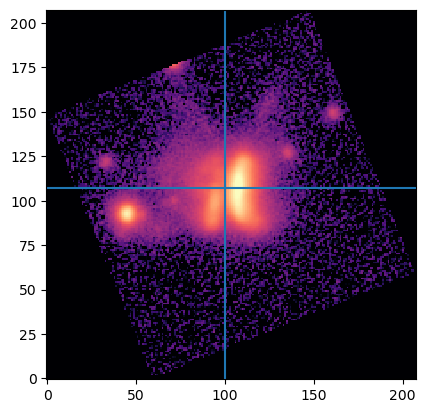

In [6]:
PA = 338.
xcen = 100
ycen = 107
data_gband = rotate(gband, PA)

norm = ImageNormalize(stretch=SqrtStretch(), vmin=0, vmax=5e4)  

plt.imshow(data_gband, origin='lower', cmap='magma', interpolation='nearest', norm=colors.SymLogNorm(linthresh=1e1, linscale=0.03,
                                              vmin=0, vmax=5e4))  

plt.axhline(ycen)
plt.axvline(xcen)

### Make a smaller cutout cube

Text(0, 0.5, 'Pixel')

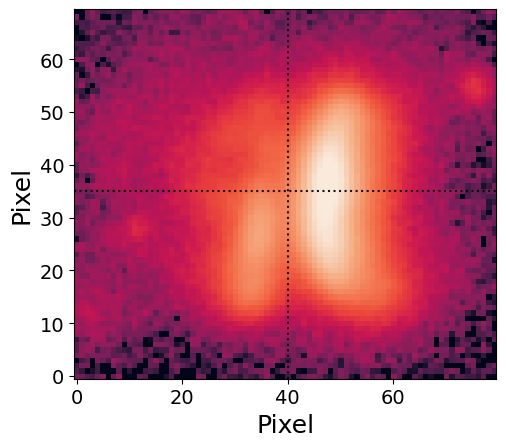

In [11]:
position = (xcen,ycen) # x,y pixels
size = (70,80)     # ny, nx pixels

fig, ax = plt.subplots(dpi=100)
my_cmap = sns.color_palette("rocket", as_cmap=True)

cutout_gband = Cutout2D(data_gband, position, size)
hdu = fits.PrimaryHDU(cutout_gband.data, header=gband_header)
hdu.writeto('rotated_PS1_g.fits', overwrite=True)

ax.imshow(cutout_gband.data, origin='lower', cmap=my_cmap, interpolation='nearest', norm=colors.SymLogNorm(linthresh=1e1, linscale=0.03,
                                              vmin=0, vmax=5e4)) 


ax.axhline(size[0]/2, c='black', ls=':', alpha=0.9)
ax.axvline(size[1]/2, c='black', ls=':', alpha=0.9)

ax.tick_params(axis='both', which='major', labelsize=14)

#plt.xticks([])
#plt.yticks([])

ax.set_xlabel('Pixel', fontsize=18)
ax.set_ylabel('Pixel', fontsize=18)

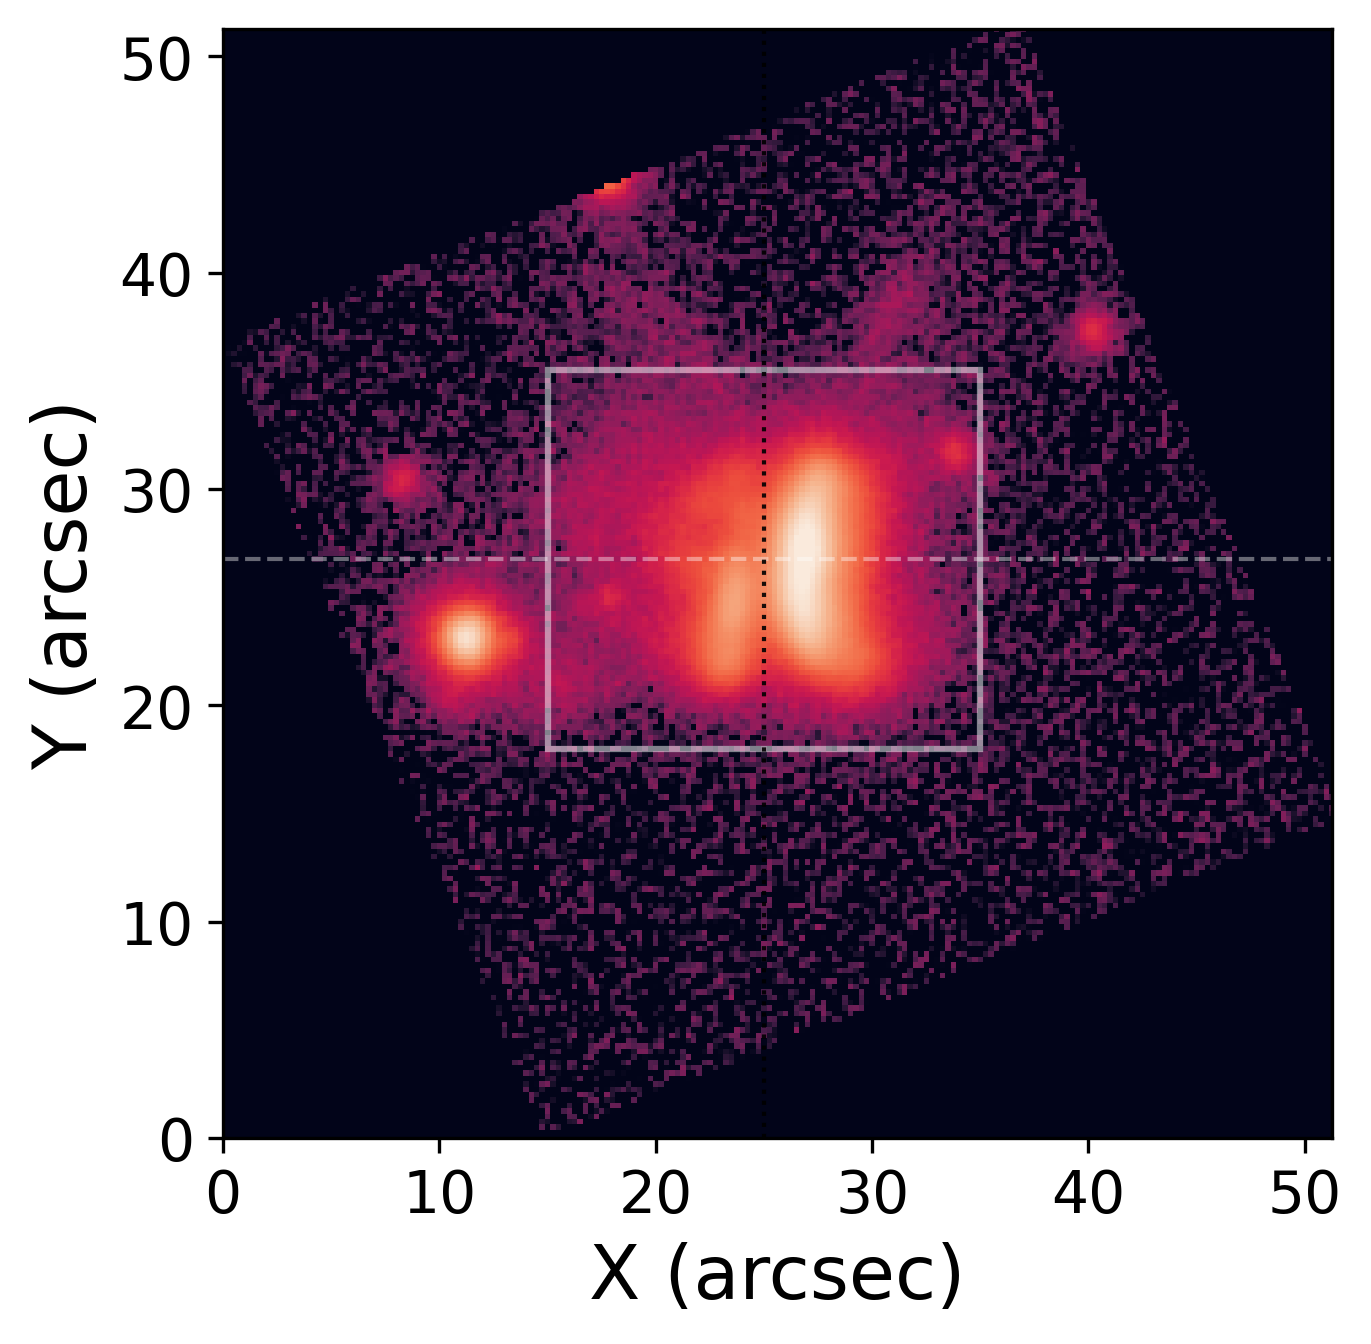

In [13]:
PA = 338.
xcen = 100
ycen = 107
data_gband = rotate(gband, PA)

my_cmap = sns.color_palette("rocket", as_cmap=True)

norm = ImageNormalize(stretch=SqrtStretch(), vmin=0, vmax=5e4)  

fig, ax = plt.subplots(dpi=300)
ax.imshow(data_gband, origin='lower', cmap=my_cmap, interpolation='nearest', norm=colors.SymLogNorm(linthresh=1e1, linscale=0.03,
                                              vmin=0, vmax=5e4))  

# Create a Rectangle patch
rect = patches.Rectangle((xcen-(size[1]/2), ycen-(size[0]/2)), size[1], size[0], linewidth=1.5, edgecolor='white', facecolor='none', alpha=0.5)

# Add the patch to the Axes
ax.add_patch(rect)


ax.axhline(ycen, c='white', ls='--', alpha=0.4, lw=1)
ax.axvline(xcen, c='black', ls=':', alpha=0.9, lw=1)

ax.tick_params(axis='both', which='major', labelsize=14)


ax.set_xlim(0,205)
ax.set_ylim(0,205)

ticks = [0,40,80,120,160,200]
ax.set_xticks(ticks)
ax.set_yticks(ticks)


from astropy import wcs
ww2 = wcs.WCS(gband_header)
pixel_scale = wcs.utils.proj_plane_pixel_scales(ww2)*u.deg
pixel_scale[1].to(u.arcsec)

tick_marks = (ticks*pixel_scale[0]).to(u.arcsec).value
tick_marks = [int(el) for el in tick_marks]
ax.set_xticklabels(tick_marks)
ax.set_yticklabels(tick_marks)



ax.set_xlabel('X (arcsec)', fontsize=18)
ax.set_ylabel('Y (arcsec)', fontsize=18)

fig.savefig('/Users/kristina/Hamburgers/Draculas_Chivito/plots/paper_plots/PS1_gband_rotated_withbox.pdf', bbox_inches='tight')


### Then plot the radial brightness in every row of the new cube

Text(0.5, 1.0, 'g band: all pixel lanes')

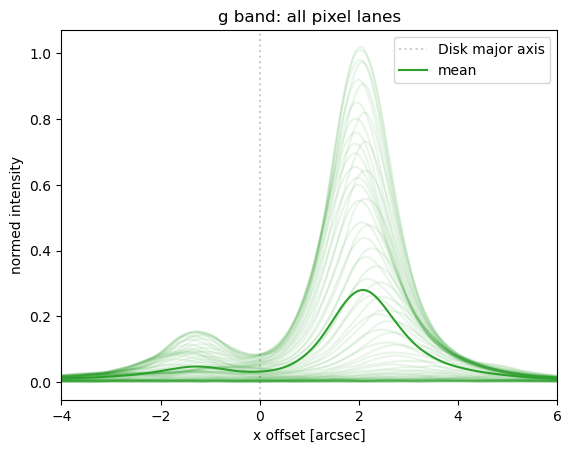

In [14]:
# center all lines to their maximum and "stack" them onto one position
from scipy.interpolate import InterpolatedUnivariateSpline as spl

old_grid_gband = np.linspace(0,cutout_gband.data.shape[1],cutout_gband.data.shape[1])
new_grid_gband = np.linspace(0,cutout_gband.data.shape[1],1000)
new_grid_centered_gband = (new_grid_gband-np.max(new_grid_gband)/2.)*(gband_header['CDELT1']*u.deg).to(u.arcsec).value

list_centered_gband = []
for i in range(len(cutout_gband.data)):
    model = spl(old_grid_gband, cutout_gband.data[i], ext=1)
    list_centered_gband.append(model(new_grid_gband))
    plt.plot(new_grid_centered_gband, model(new_grid_gband)/np.max(cutout_gband.data), c='C2', alpha=0.1)
list_centered_gband = np.array(list_centered_gband)   

#normed_intensity = np.sum(list_centered, axis=0)/(np.max(np.sum(list_centered, axis=0))) 
mean_list_centered_gband = np.mean(list_centered_gband, axis=0)
median_list_centered_gband = np.median(list_centered_gband, axis=0)
std_list_centered_gband = np.std(list_centered_gband, axis=0)

plt.axvline(0, ls=':', c='black', alpha=0.2, label='Disk major axis')

plt.plot(new_grid_centered_gband, mean_list_centered_gband/np.max(cutout_gband.data), label='mean', c='C2')

#plt.fill_between(new_grid_centered, (mean_list_centered+std_list_centered)/np.max(cutout_gband.data)/np.max(mean_list_centered), 
#                 (mean_list_centered-std_list_centered)/np.max(cutout_gband.data)/np.max(mean_list_centered), color='gray', alpha=0.2, label='$\pm1\,\sigma$')
#plt.plot(new_grid_centered, median_list_centered/np.max(median_list_centered), label='median')

plt.xlabel('x offset [arcsec]')
plt.ylabel('normed intensity')
plt.xlim(-4,6)
plt.legend()
plt.title('g band: all pixel lanes')


/Users/kristina/miniconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/kristina/miniconda3/lib/python3.10/site-packages/numpy/core/_methods.py:184: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Text(0.5, 1.0, '$g$ band')

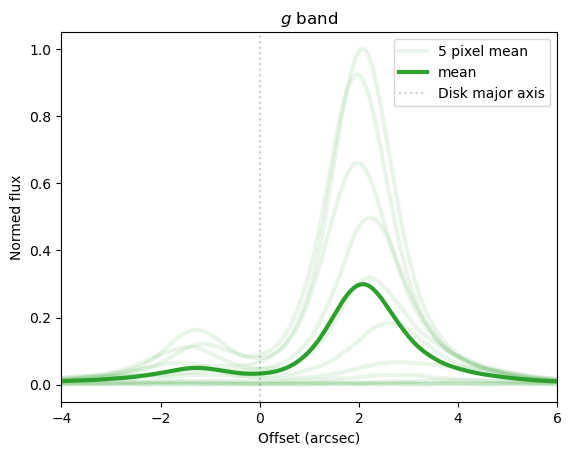

In [15]:
n_cuts = int(size[0]/14)
rolling_mean_gband = []

maxima = []

### first loop through all and compute the maximum
for j in range(int(len(cutout_gband.data)/n_cuts)):
    id_low = j+(j*n_cuts)
    j += 1
    id_up = j+(j*n_cuts)
    model_rolling_mean = spl(old_grid_gband, np.mean(cutout_gband.data[id_low:id_up,:], axis=0), ext=1)
    maxima.append(np.max(model_rolling_mean(new_grid_gband)))  
maxima = np.array(maxima)
    
    
    
for j in range(int(len(cutout_gband.data)/n_cuts)):
    id_low = j+(j*n_cuts)
    j += 1
    id_up = j+(j*n_cuts)
    model_rolling_mean = spl(old_grid_gband, np.mean(cutout_gband.data[id_low:id_up,:], axis=0), ext=1)
    rolling_mean_gband.append(model_rolling_mean(new_grid_gband))
    plt.plot(new_grid_centered_gband, model_rolling_mean(new_grid_gband)/np.nanmax(maxima), c='C2', alpha=0.1, lw=3)
    
plt.plot(0, 0, c='C2', alpha=0.1, lw=3, label='5 pixel mean')

mean_list_centered_gband = np.nanmean(rolling_mean_gband, axis=0)
plt.plot(new_grid_centered_gband, mean_list_centered_gband/np.nanmax(maxima), label='mean', c='C2', lw=3)

plt.axvline(0, ls=':', c='black', alpha=0.2, label='Disk major axis')

plt.xlabel('Offset (arcsec)')
plt.ylabel('Normed flux')
plt.xlim(-4,6)
plt.legend()
plt.title(r'$g$ band')



Text(0.5, 1.0, '$g$ band')

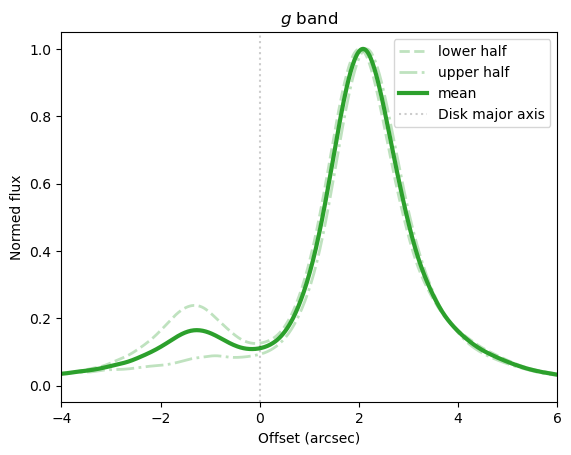

In [16]:
n_cuts = int(size[0]/2)
rolling_mean_gband = []

maxima_gband = []

### first loop through all and compute the maximum
for j in range(int(len(cutout_gband.data)/n_cuts)):
    id_low = j+(j*n_cuts)
    j += 1
    id_up = j+(j*n_cuts)
    model_rolling_mean = spl(old_grid_gband, np.mean(cutout_gband.data[id_low:id_up,:], axis=0), ext=1)
    rolling_mean_gband.append(model_rolling_mean(new_grid_gband))
    maxima_gband.append(np.max(model_rolling_mean(new_grid_gband)))  
maxima_gband = np.array(maxima_gband)
rolling_mean_gband = np.array(rolling_mean_gband)

plt.plot(new_grid_centered_gband,rolling_mean_gband[0]/maxima_gband[0], c='C2', ls='--', alpha=0.3, lw=2, label='lower half')
plt.plot(new_grid_centered_gband,rolling_mean_gband[1]/maxima_gband[1], c='C2', ls='-.', alpha=0.3, lw=2, label='upper half')

mean_list_centered_gband = np.nanmean(rolling_mean_gband, axis=0)
plt.plot(new_grid_centered_gband, mean_list_centered_gband/np.nanmax(mean_list_centered_gband), label='mean', c='C2', lw=3)

plt.axvline(0, ls=':', c='black', alpha=0.2, label='Disk major axis')

plt.xlabel('Offset (arcsec)')
plt.ylabel('Normed flux')
plt.xlim(-4,6)
plt.legend()
plt.title(r'$g$ band')



Text(0.5, 1.0, 'g band')

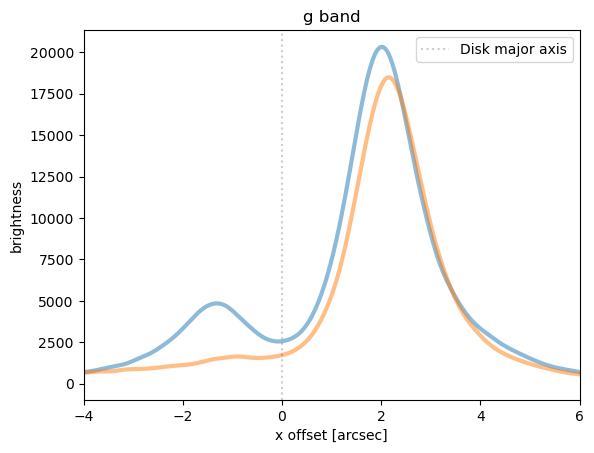

In [17]:
n_cuts = int(size[0]/2.)
rolling_mean_gband = []

for j in range(int(len(cutout_gband.data)/n_cuts)):
    id_low = j+(j*n_cuts)
    j += 1
    id_up = j+(j*n_cuts)
    #print(id_low, id_up)
    model_rolling_mean = spl(old_grid_gband, np.mean(cutout_gband.data[id_low:id_up,:], axis=0), ext=1)
    rolling_mean_gband.append(model_rolling_mean(new_grid_gband))
    plt.plot(new_grid_centered_gband, model_rolling_mean(new_grid_gband), alpha=0.5, lw=3)
    
rolling_mean_gband = np.array(rolling_mean_gband) 

plt.axvline(0, ls=':', c='black', alpha=0.2, label='Disk major axis')

plt.xlabel('x offset [arcsec]')
plt.ylabel('brightness')
plt.xlim(-4,6)
plt.legend()
plt.title('g band')



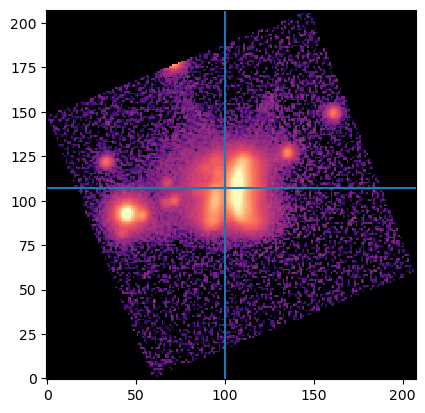

In [18]:
data_rband = rotate(rband, PA)

norm = ImageNormalize(stretch=SqrtStretch(), vmin=0, vmax=5e4)  

hdu = fits.PrimaryHDU(data_rband, header=rband_header)
hdu.writeto('rotated_PS1_r.fits', overwrite=True)

plt.imshow(data_rband, origin='lower', cmap='magma', interpolation='nearest', norm=colors.SymLogNorm(linthresh=1e1, linscale=0.03,
                                              vmin=0, vmax=5e4))  

plt.axhline(ycen)
plt.axvline(xcen)

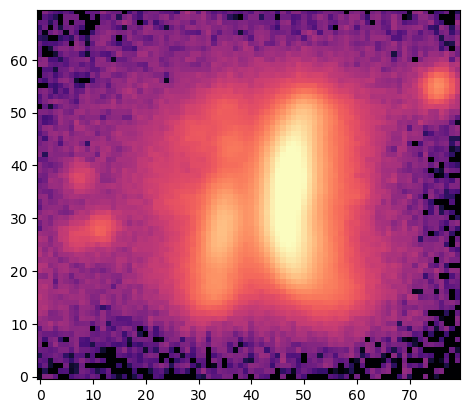

In [19]:
cutout_rband = Cutout2D(data_rband, position, size)
hdu = fits.PrimaryHDU(cutout_rband.data, header=rband_header)
hdu.writeto('rotated_PS1_r.fits', overwrite=True)

plt.imshow(cutout_rband.data, origin='lower', cmap='magma', interpolation='nearest', norm=colors.SymLogNorm(linthresh=1e1, linscale=0.03,
                                              vmin=0, vmax=5e4)) 

Text(0.5, 1.0, 'r band')

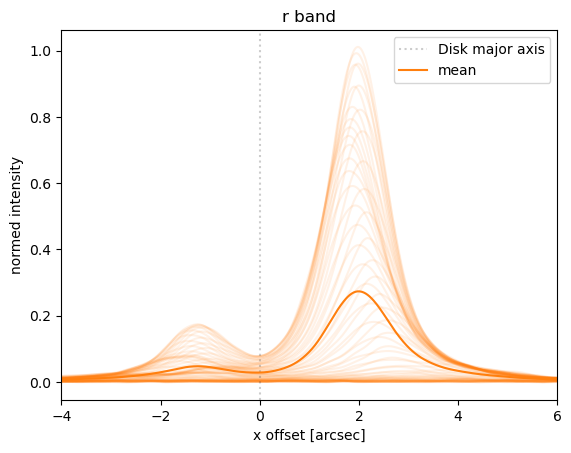

In [20]:
# center all lines to their maximum and "stack" them onto one position
from scipy.interpolate import InterpolatedUnivariateSpline as spl

old_grid_rband = np.linspace(0,cutout_rband.data.shape[1],cutout_rband.data.shape[1])
new_grid_rband = np.linspace(0,cutout_rband.data.shape[1],1000)
new_grid_centered_rband = (new_grid_rband-np.max(new_grid_rband)/2.)*(rband_header['CDELT1']*u.deg).to(u.arcsec).value

list_centered_rband = []
rolling_mean_rband = []
for i in range(len(cutout_rband.data)):
    
    model = spl(old_grid_rband, cutout_rband.data[i], ext=1)
    list_centered_rband.append(model(new_grid_rband))
    plt.plot(new_grid_centered_rband, model(new_grid_rband)/np.max(cutout_rband.data), c='C1', alpha=0.1)
    
list_centered_rband = np.array(list_centered_rband)

#normed_intensity = np.sum(list_centered, axis=0)/(np.max(np.sum(list_centered, axis=0))) 
mean_list_centered_rband = np.mean(list_centered_rband, axis=0)
median_list_centered_rband = np.median(list_centered_rband, axis=0)
std_list_centered_rband = np.std(list_centered_rband, axis=0)

plt.axvline(0, ls=':', c='black', alpha=0.2, label='Disk major axis')

plt.plot(new_grid_centered_rband, mean_list_centered_rband/np.max(cutout_rband.data), label='mean', c='C1')

#plt.fill_between(new_grid_centered, (mean_list_centered+std_list_centered)/np.max(cutout_rband.data)/np.max(mean_list_centered), 
#                 (mean_list_centered-std_list_centered)/np.max(cutout_rband.data)/np.max(mean_list_centered), color='gray', alpha=0.2, label='$\pm1\,\sigma$')
#plt.plot(new_grid_centered, median_list_centered/np.max(median_list_centered), label='median')

plt.xlabel('x offset [arcsec]')
plt.ylabel('normed intensity')
plt.xlim(-4,6)
plt.legend()
plt.title('r band')


Text(0.5, 1.0, '$r$ band')

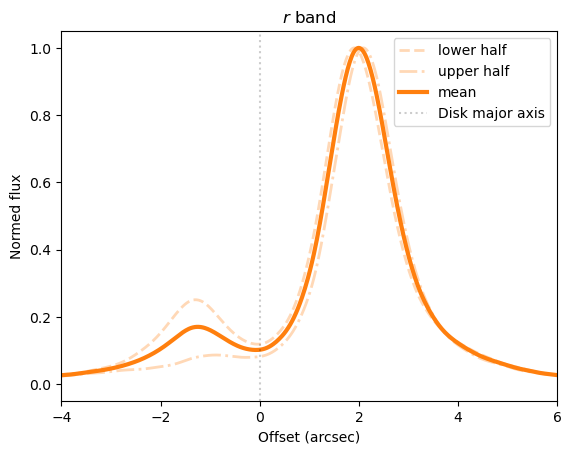

In [21]:
n_cuts = int(size[0]/2)
rolling_mean_rband = []

maxima_rband = []

### first loop through all and compute the maximum
for j in range(int(len(cutout_rband.data)/n_cuts)):
    id_low = j+(j*n_cuts)
    j += 1
    id_up = j+(j*n_cuts)
    model_rolling_mean = spl(old_grid_rband, np.mean(cutout_rband.data[id_low:id_up,:], axis=0), ext=1)
    rolling_mean_rband.append(model_rolling_mean(new_grid_rband))
    maxima_rband.append(np.max(model_rolling_mean(new_grid_rband)))  
maxima_rband = np.array(maxima_rband)
rolling_mean_rband = np.array(rolling_mean_rband)

plt.plot(new_grid_centered_rband,rolling_mean_rband[0]/maxima_rband[0], c='C1', ls='--', alpha=0.3, lw=2, label='lower half')
plt.plot(new_grid_centered_rband,rolling_mean_rband[1]/maxima_rband[1], c='C1', ls='-.', alpha=0.3, lw=2, label='upper half')

mean_list_centered_rband = np.nanmean(rolling_mean_rband, axis=0)
plt.plot(new_grid_centered_rband, mean_list_centered_rband/np.nanmax(mean_list_centered_rband), label='mean', c='C1', lw=3)

plt.axvline(0, ls=':', c='black', alpha=0.2, label='Disk major axis')

plt.xlabel('Offset (arcsec)')
plt.ylabel('Normed flux')
plt.xlim(-4,6)
plt.legend()
plt.title(r'$r$ band')



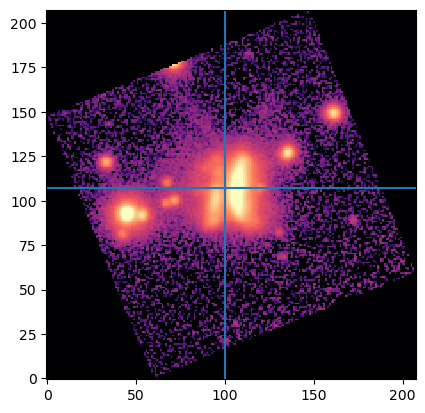

In [22]:
data_iband = rotate(iband, PA)

hdu = fits.PrimaryHDU(data_iband, header=iband_header)
hdu.writeto('rotated_PS1_i.fits', overwrite=True)

norm = ImageNormalize(stretch=SqrtStretch(), vmin=0, vmax=5e4)  

plt.imshow(data_iband, origin='lower', cmap='magma', interpolation='nearest', norm=colors.SymLogNorm(linthresh=1e1, linscale=0.03,
                                              vmin=0, vmax=5e4))  

plt.axhline(ycen)
plt.axvline(xcen)

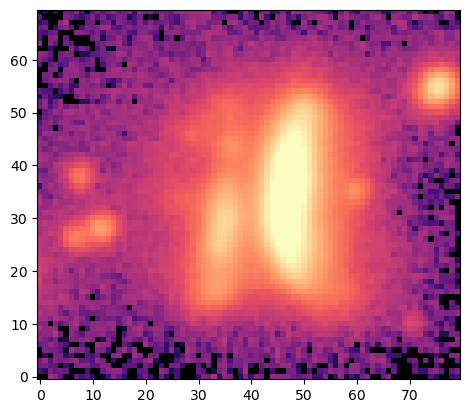

In [23]:
cutout_iband = Cutout2D(data_iband, position, size)
hdu = fits.PrimaryHDU(cutout_iband.data, header=iband_header)
hdu.writeto('rotated_PS1_i.fits', overwrite=True)

plt.imshow(cutout_iband.data, origin='lower', cmap='magma', interpolation='nearest', norm=colors.SymLogNorm(linthresh=1e1, linscale=0.03,
                                              vmin=0, vmax=5e4)) 

Text(0.5, 1.0, 'i band')

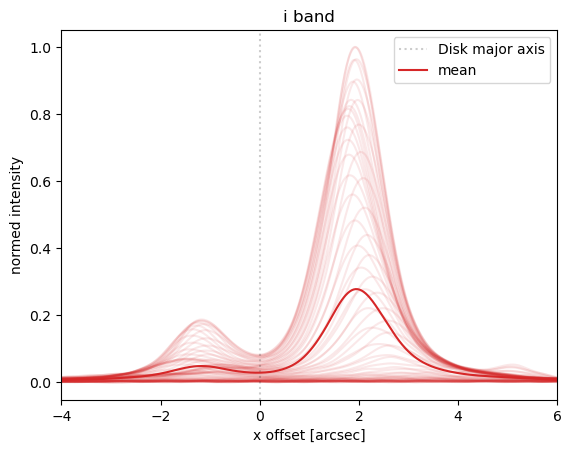

In [24]:
# center all lines to their maximum and "stack" them onto one position
from scipy.interpolate import InterpolatedUnivariateSpline as spl

old_grid_iband = np.linspace(0,cutout_iband.data.shape[1],cutout_iband.data.shape[1])
new_grid_iband = np.linspace(0,cutout_iband.data.shape[1],1000)
new_grid_centered_iband = (new_grid_iband-np.max(new_grid_iband)/2.)*(iband_header['CDELT1']*u.deg).to(u.arcsec).value

list_centered_iband = []
for i in range(len(cutout_iband.data)):
    
    model = spl(old_grid_iband, cutout_iband.data[i], ext=1)
    list_centered_iband.append(model(new_grid_iband))
    plt.plot(new_grid_centered_iband, model(new_grid_iband)/np.max(cutout_iband.data), c='C3', alpha=0.1)
    
list_centered_iband = np.array(list_centered_iband)

#normed_intensity = np.sum(list_centered, axis=0)/(np.max(np.sum(list_centered, axis=0))) 
mean_list_centered_iband = np.mean(list_centered_iband, axis=0)
median_list_centered_iband = np.median(list_centered_iband, axis=0)
std_list_centered_iband = np.std(list_centered_iband, axis=0)

plt.axvline(0, ls=':', c='black', alpha=0.2, label='Disk major axis')

plt.plot(new_grid_centered_iband, mean_list_centered_iband/np.max(cutout_iband.data), label='mean', c='C3')

#plt.fill_between(new_grid_centered, (mean_list_centered+std_list_centered)/np.max(cutout_iband.data)/np.max(mean_list_centered), 
#                 (mean_list_centered-std_list_centered)/np.max(cutout_iband.data)/np.max(mean_list_centered), color='gray', alpha=0.2, label='$\pm1\,\sigma$')
#plt.plot(new_grid_centered, median_list_centered/np.max(median_list_centered), label='median')

plt.xlabel('x offset [arcsec]')
plt.ylabel('normed intensity')
plt.xlim(-4,6)
plt.legend()
plt.title('i band')


Text(0.5, 1.0, '$i$ band')

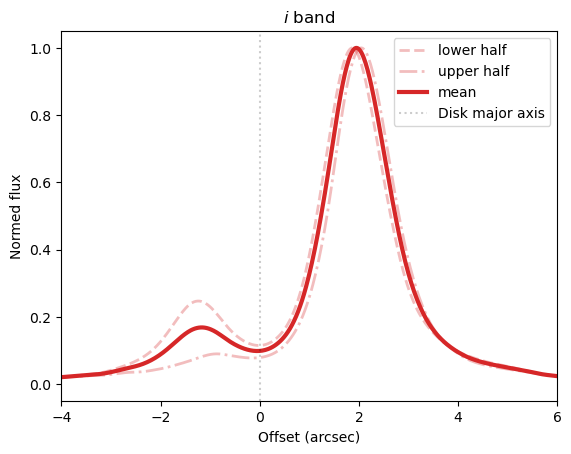

In [25]:
n_cuts = int(size[0]/2)
rolling_mean_iband = []

maxima_iband = []

### first loop through all and compute the maximum
for j in range(int(len(cutout_iband.data)/n_cuts)):
    id_low = j+(j*n_cuts)
    j += 1
    id_up = j+(j*n_cuts)
    model_rolling_mean = spl(old_grid_iband, np.mean(cutout_iband.data[id_low:id_up,:], axis=0), ext=1)
    rolling_mean_iband.append(model_rolling_mean(new_grid_iband))
    maxima_iband.append(np.max(model_rolling_mean(new_grid_iband)))  
maxima_iband = np.array(maxima_iband)
rolling_mean_iband = np.array(rolling_mean_iband)

plt.plot(new_grid_centered_iband,rolling_mean_iband[0]/maxima_iband[0], c='C3', ls='--', alpha=0.3, lw=2, label='lower half')
plt.plot(new_grid_centered_iband,rolling_mean_iband[1]/maxima_iband[1], c='C3', ls='-.', alpha=0.3, lw=2, label='upper half')

mean_list_centered_iband = np.nanmean(rolling_mean_iband, axis=0)
plt.plot(new_grid_centered_iband, mean_list_centered_iband/np.nanmax(mean_list_centered_iband), label='mean', c='C3', lw=3)

plt.axvline(0, ls=':', c='black', alpha=0.2, label='Disk major axis')

plt.xlabel('Offset (arcsec)')
plt.ylabel('Normed flux')
plt.xlim(-4,6)
plt.legend()
plt.title(r'$i$ band')



### Make the paper version plot

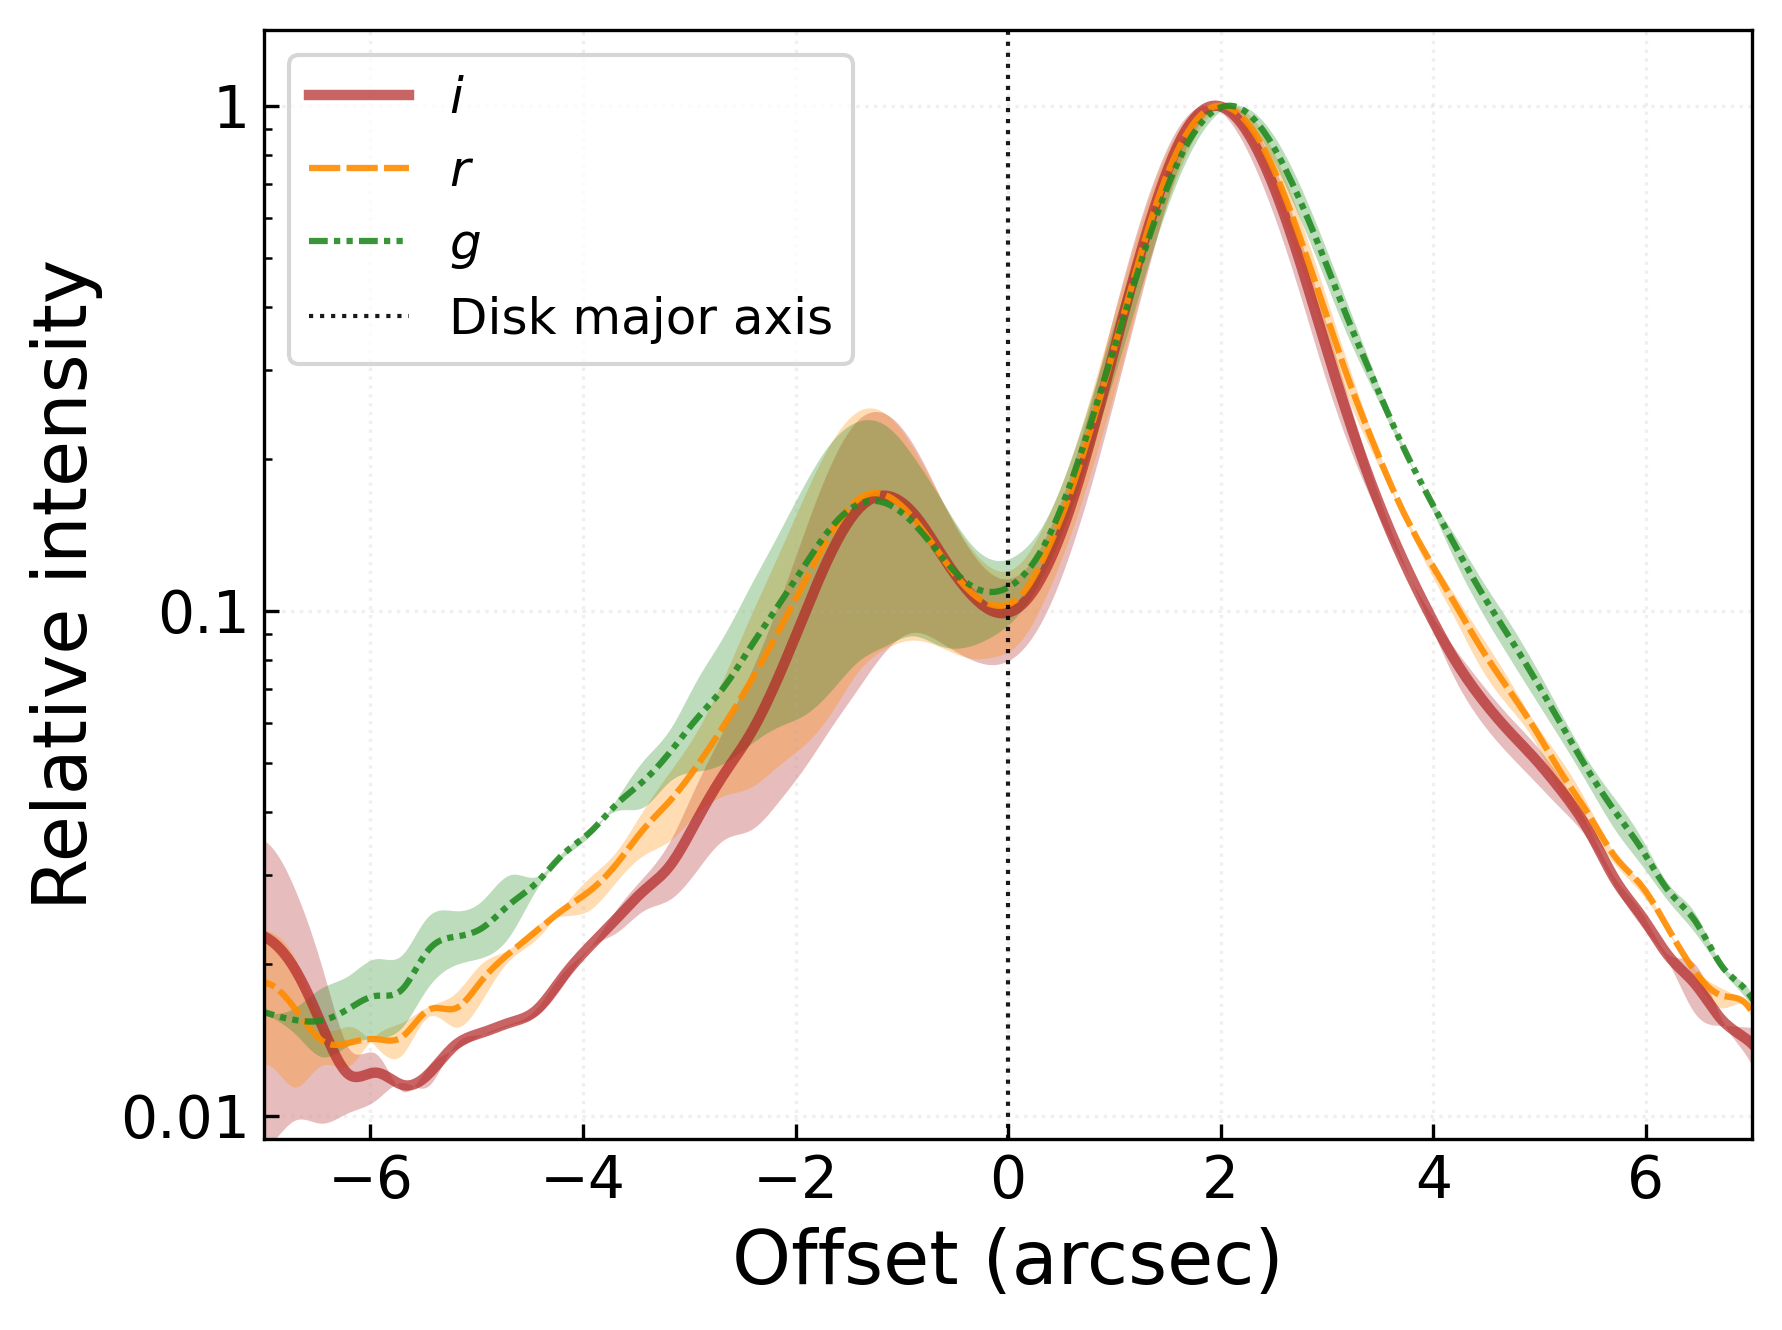

In [31]:
import seaborn as sns
import matplotlib 

cmap = sns.color_palette()

fig, ax = plt.subplots(dpi=300)


ax.plot(new_grid_centered_iband, mean_list_centered_iband/np.nanmax(mean_list_centered_iband), label='$i$', c='firebrick', lw=2.5, alpha=0.7)
ax.fill_between(new_grid_centered_iband, rolling_mean_iband[0]/maxima_iband[0], rolling_mean_iband[1]/maxima_iband[1], alpha=0.3, color='firebrick', lw=0)

ax.plot(new_grid_centered_rband, mean_list_centered_rband/np.nanmax(mean_list_centered_rband), label='$r$', c='darkorange', lw=1.5, alpha=0.9, ls=(0, (5, 1)))
ax.fill_between(new_grid_centered_rband, rolling_mean_rband[0]/maxima_rband[0], rolling_mean_rband[1]/maxima_rband[1], alpha=0.3, color='darkorange', lw=0)

ax.plot(new_grid_centered_gband, mean_list_centered_gband/np.nanmax(mean_list_centered_gband), label='$g$', c='forestgreen', lw=1.5, alpha=0.9, ls=(0, (3, 1, 1, 1, 1, 1)))
ax.fill_between(new_grid_centered_gband, rolling_mean_gband[0]/maxima_gband[0], rolling_mean_gband[1]/maxima_gband[1], alpha=0.3, color='forestgreen', lw=0)

ax.axvline(0, ls=':', lw=1, c='black', alpha=0.9, label='Disk major axis')


#ax.plot(new_grid_centered_cont, mean_list_centered_cont/np.max(mean_list_centered_cont), label='SMA cont.', c='black')

ax.grid(alpha=0.2, ls=':')
ax.tick_params(axis="x",which='both', direction="in")

import matplotlib.ticker as ticker

ax.set_yscale('log')
ax.set_ylim(9e-3)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax.tick_params(axis="y", which='both', direction="in")


ax.set_xlabel('Offset (arcsec)', fontsize=18)
ax.set_ylabel('Relative intensity', fontsize=18)
ax.set_xlim(-7, 7)
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_yticks(fontsize=12)
ax.legend(fontsize=12)

fig.savefig('/Users/kristina/Hamburgers/Draculas_Chivito/plots/paper_plots/PS1_brightness_asymmetry_log.pdf', bbox_inches='tight')


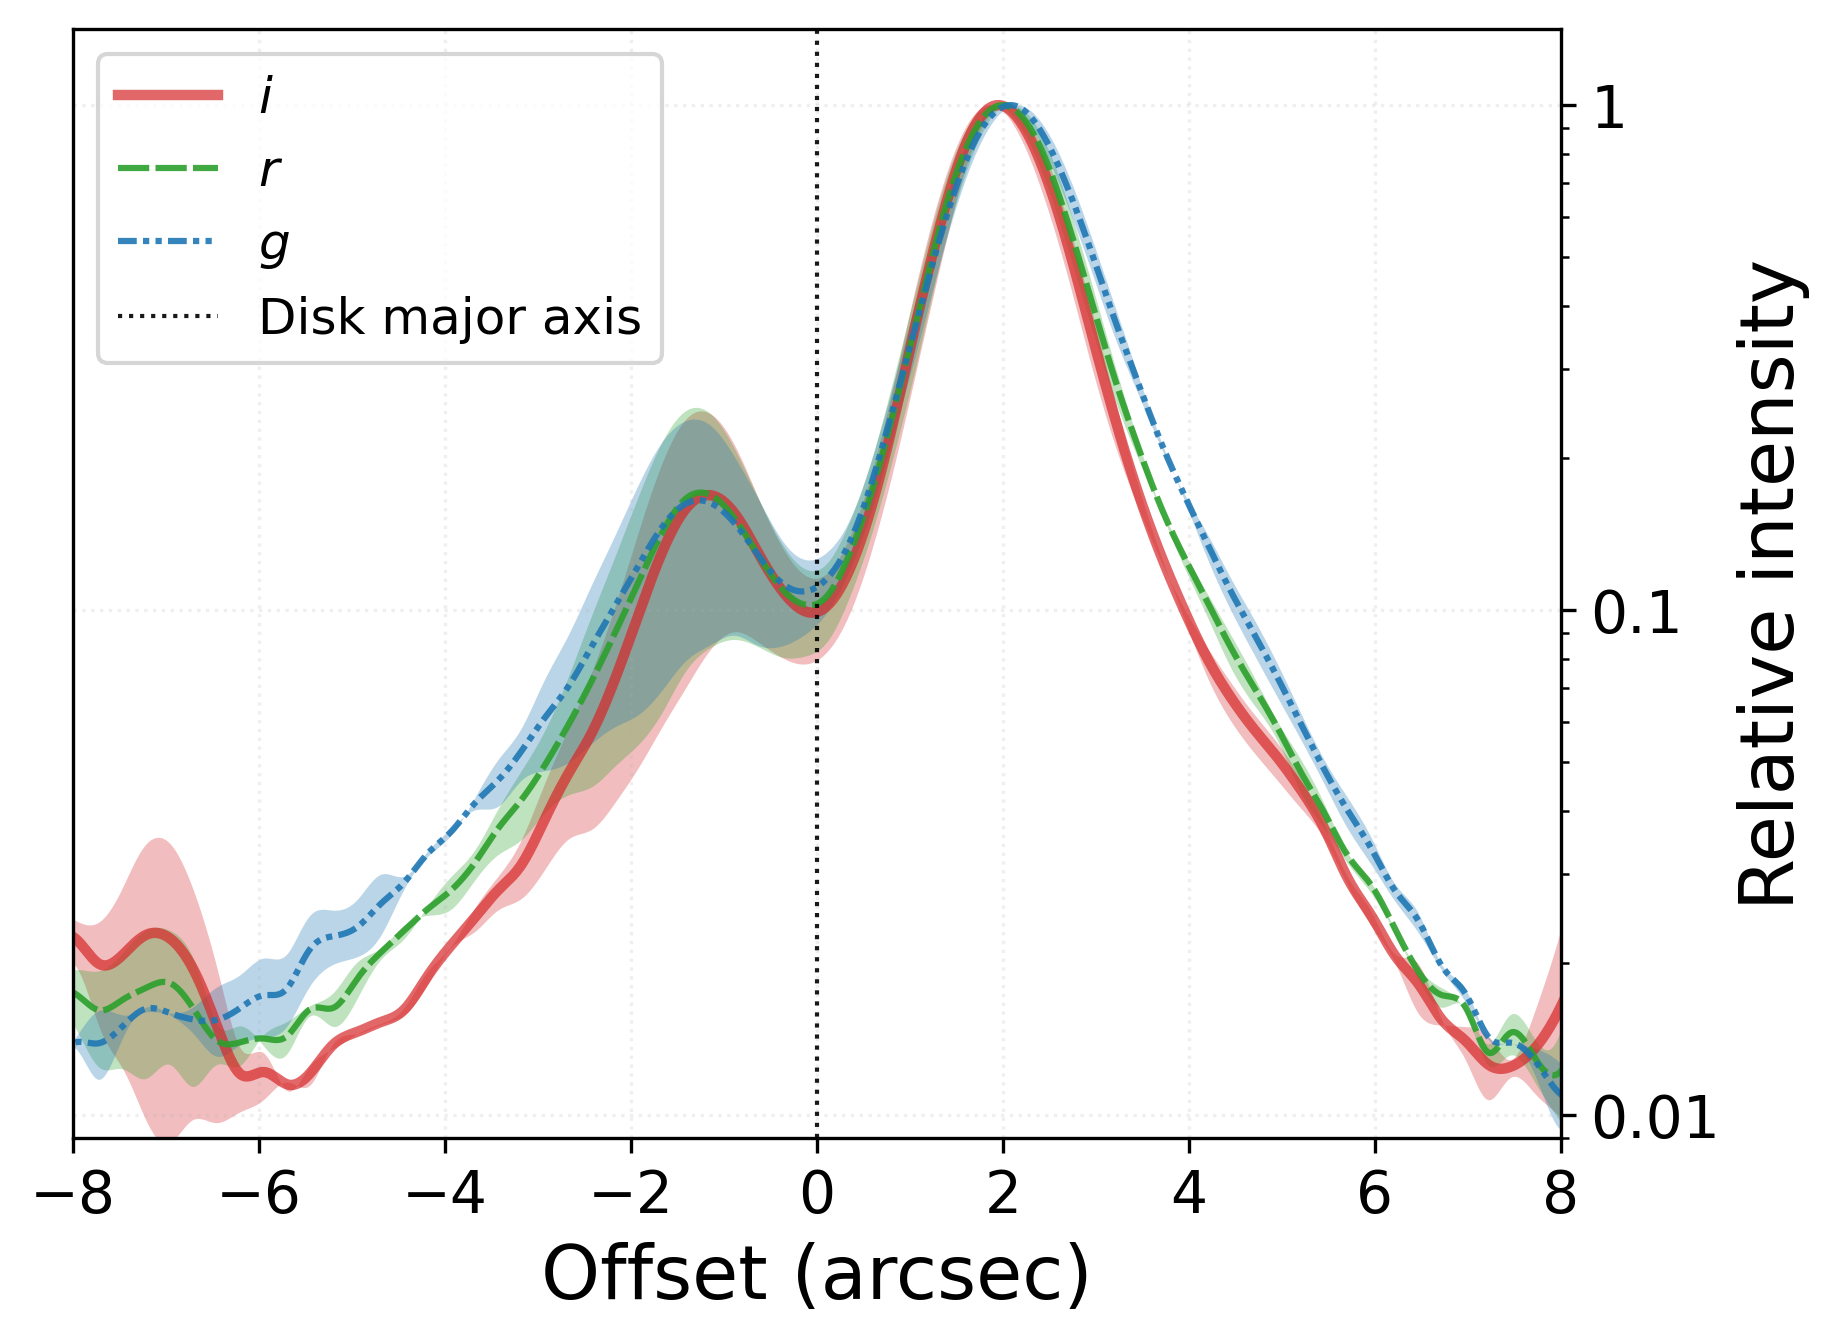

In [32]:
import seaborn as sns
import matplotlib 

cmap = sns.color_palette()

fig, ax = plt.subplots(dpi=300)


ax.plot(new_grid_centered_iband, mean_list_centered_iband/np.nanmax(mean_list_centered_iband), label='$i$', c='C3', lw=2.5, alpha=0.7)
ax.fill_between(new_grid_centered_iband, rolling_mean_iband[0]/maxima_iband[0], rolling_mean_iband[1]/maxima_iband[1], alpha=0.3, color='C3', lw=0)

ax.plot(new_grid_centered_rband, mean_list_centered_rband/np.nanmax(mean_list_centered_rband), label='$r$', c='C2', lw=1.5, alpha=0.9, ls=(0, (5, 1)))
ax.fill_between(new_grid_centered_rband, rolling_mean_rband[0]/maxima_rband[0], rolling_mean_rband[1]/maxima_rband[1], alpha=0.3, color='C2', lw=0)

ax.plot(new_grid_centered_gband, mean_list_centered_gband/np.nanmax(mean_list_centered_gband), label='$g$', c='C0', lw=1.5, alpha=0.9, ls=(0, (3, 1, 1, 1, 1, 1)))
ax.fill_between(new_grid_centered_gband, rolling_mean_gband[0]/maxima_gband[0], rolling_mean_gband[1]/maxima_gband[1], alpha=0.3, color='C0', lw=0)

ax.axvline(0, ls=':', lw=1, c='black', alpha=0.9, label='Disk major axis')


#ax.plot(new_grid_centered_cont, mean_list_centered_cont/np.max(mean_list_centered_cont), label='SMA cont.', c='black')

ax.grid(alpha=0.2, ls=':')
#ax.tick_params(axis="x",which='both', direction="in")

import matplotlib.ticker as ticker

ax.set_yscale('log')
ax.set_ylim(9e-3)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
#ax.tick_params(axis="y", which='both', direction="in")

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()


ax.set_xlabel('Offset (arcsec)', fontsize=18)
ax.set_ylabel('Relative intensity', fontsize=18)
ax.set_xlim(-8,8)
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_yticks(fontsize=12)
ax.legend(fontsize=12)

fig.savefig('/Users/kristina/Hamburgers/Draculas_Chivito/plots/paper_plots/PS1_brightness_asymmetry_log_2.pdf', bbox_inches='tight')


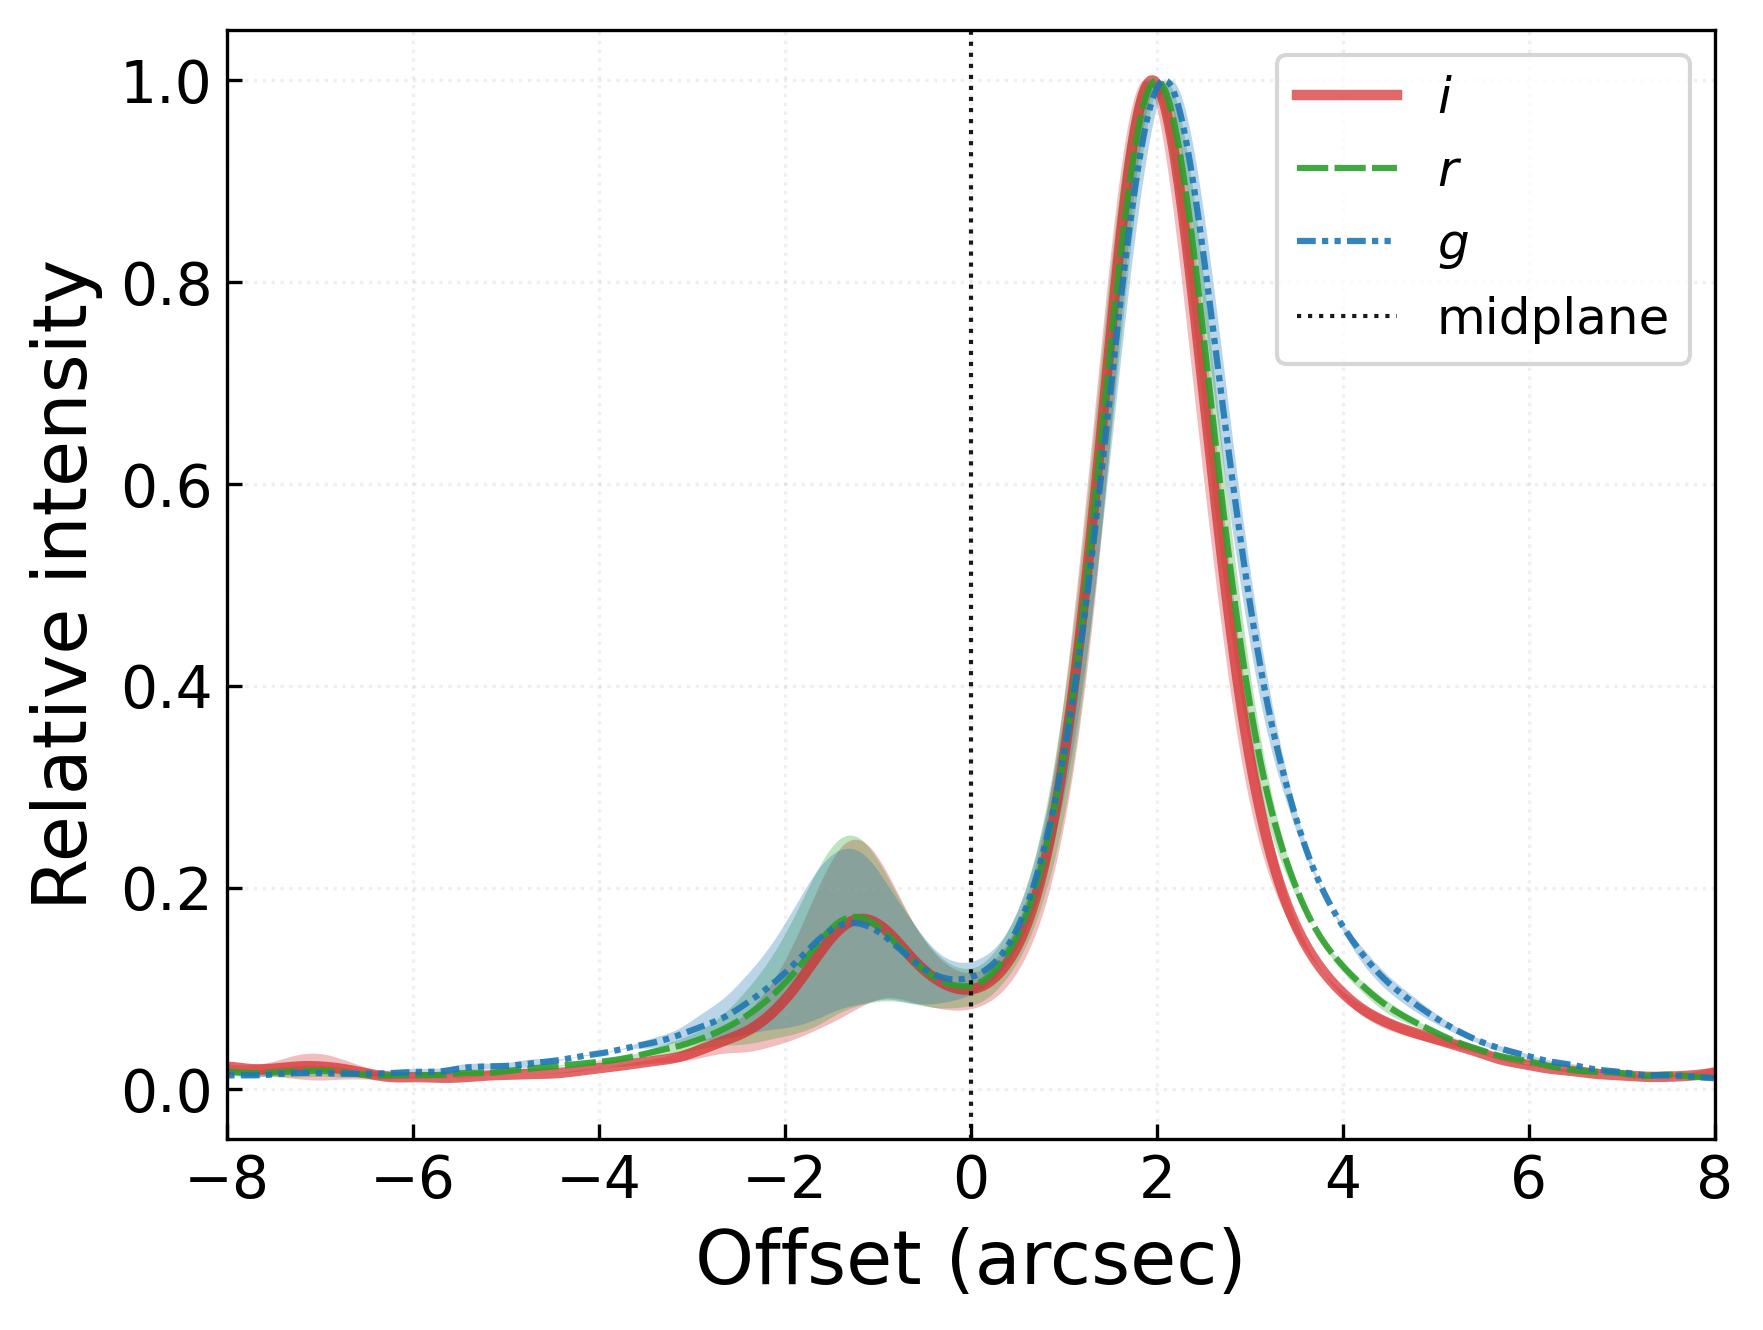

In [33]:
import seaborn as sns
import matplotlib 

cmap = sns.color_palette()

fig, ax = plt.subplots(dpi=300)


ax.plot(new_grid_centered_iband, mean_list_centered_iband/np.nanmax(mean_list_centered_iband), label='$i$', c='C3', lw=2.5, alpha=0.7)
ax.fill_between(new_grid_centered_iband, rolling_mean_iband[0]/maxima_iband[0], rolling_mean_iband[1]/maxima_iband[1], alpha=0.3, color='C3', lw=0)

ax.plot(new_grid_centered_rband, mean_list_centered_rband/np.nanmax(mean_list_centered_rband), label='$r$', c='C2', lw=1.5, alpha=0.9, ls=(0, (5, 1)))
ax.fill_between(new_grid_centered_rband, rolling_mean_rband[0]/maxima_rband[0], rolling_mean_rband[1]/maxima_rband[1], alpha=0.3, color='C2', lw=0)

ax.plot(new_grid_centered_gband, mean_list_centered_gband/np.nanmax(mean_list_centered_gband), label='$g$', c='C0', lw=1.5, alpha=0.9, ls=(0, (3, 1, 1, 1, 1, 1)))
ax.fill_between(new_grid_centered_gband, rolling_mean_gband[0]/maxima_gband[0], rolling_mean_gband[1]/maxima_gband[1], alpha=0.3, color='C0', lw=0)

ax.axvline(0, ls=':', lw=1, c='black', alpha=0.9, label='midplane')


#ax.plot(new_grid_centered_cont, mean_list_centered_cont/np.max(mean_list_centered_cont), label='SMA cont.', c='black')

ax.grid(alpha=0.2, ls=':')
ax.tick_params(axis="both",which='both', direction="in")

import matplotlib.ticker as ticker

#ax.set_yscale('log')
#ax.set_ylim(9e-3)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
#ax.tick_params(axis="y", which='both', direction="in")

#ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()


ax.set_xlabel('Offset (arcsec)', fontsize=18)
ax.set_ylabel('Relative intensity', fontsize=18)
ax.set_xlim(-8,8)
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_yticks(fontsize=12)
ax.legend(fontsize=12, loc='upper right')

fig.savefig('/Users/kristina/Hamburgers/Draculas_Chivito/plots/paper_plots/PS1_brightness_asymmetry_lin.pdf', bbox_inches='tight')


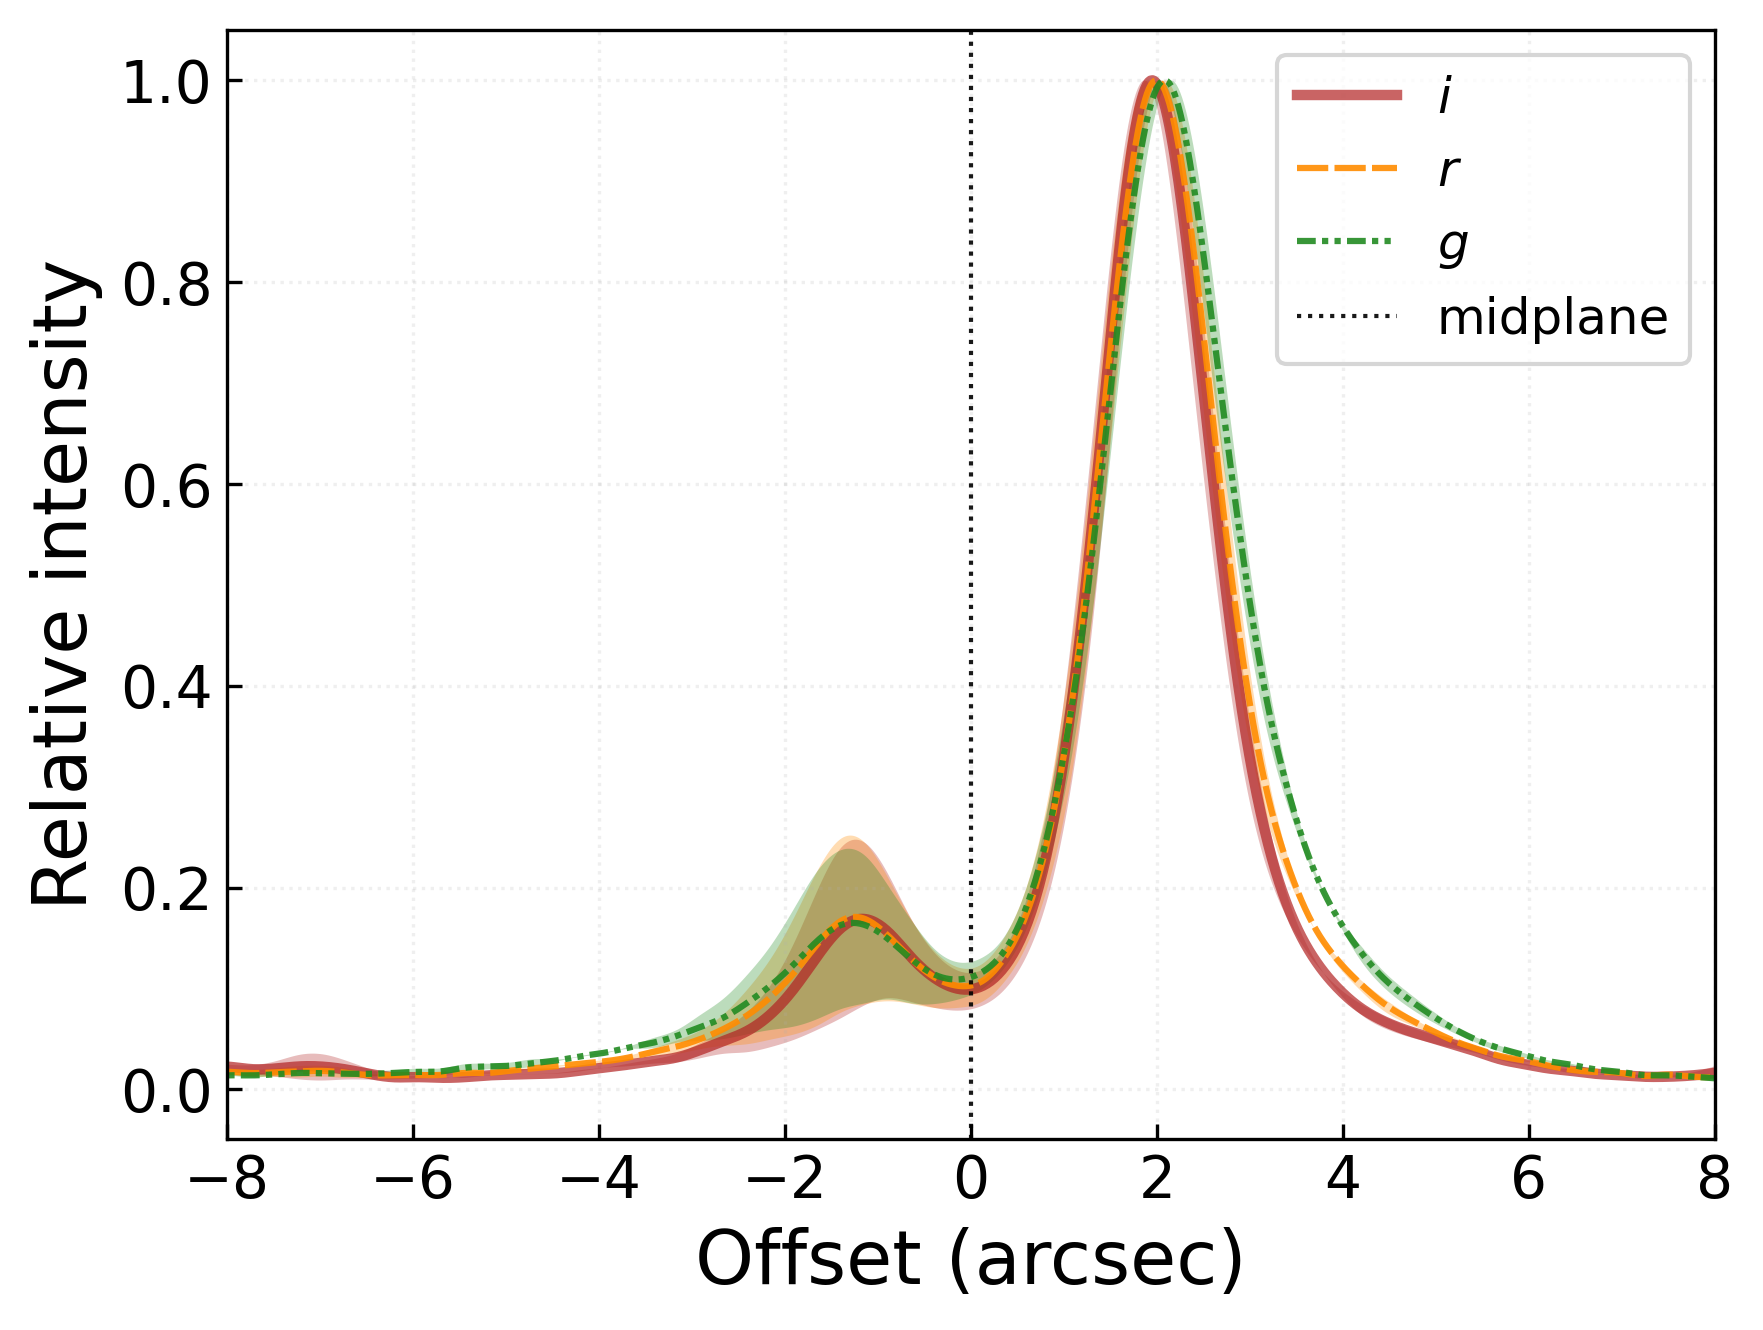

In [34]:
import seaborn as sns
import matplotlib 

cmap = sns.color_palette()

fig, ax = plt.subplots(dpi=300)


ax.plot(new_grid_centered_iband, mean_list_centered_iband/np.nanmax(mean_list_centered_iband), label='$i$', c='firebrick', lw=2.5, alpha=0.7)
ax.fill_between(new_grid_centered_iband, rolling_mean_iband[0]/maxima_iband[0], rolling_mean_iband[1]/maxima_iband[1], alpha=0.3, color='firebrick', lw=0)

ax.plot(new_grid_centered_rband, mean_list_centered_rband/np.nanmax(mean_list_centered_rband), label='$r$', c='darkorange', lw=1.5, alpha=0.9, ls=(0, (5, 1)))
ax.fill_between(new_grid_centered_rband, rolling_mean_rband[0]/maxima_rband[0], rolling_mean_rband[1]/maxima_rband[1], alpha=0.3, color='darkorange', lw=0)

ax.plot(new_grid_centered_gband, mean_list_centered_gband/np.nanmax(mean_list_centered_gband), label='$g$', c='forestgreen', lw=1.5, alpha=0.9, ls=(0, (3, 1, 1, 1, 1, 1)))
ax.fill_between(new_grid_centered_gband, rolling_mean_gband[0]/maxima_gband[0], rolling_mean_gband[1]/maxima_gband[1], alpha=0.3, color='forestgreen', lw=0)

ax.axvline(0, ls=':', lw=1, c='black', alpha=0.9, label='midplane')


#ax.plot(new_grid_centered_cont, mean_list_centered_cont/np.max(mean_list_centered_cont), label='SMA cont.', c='black')

ax.grid(alpha=0.2, ls=':')
ax.tick_params(axis="both",which='both', direction="in")

import matplotlib.ticker as ticker

#ax.set_yscale('log')
#ax.set_ylim(9e-3)
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
#ax.tick_params(axis="y", which='both', direction="in")

#ax.yaxis.set_label_position("right")
#ax.yaxis.tick_right()


ax.set_xlabel('Offset (arcsec)', fontsize=18)
ax.set_ylabel('Relative intensity', fontsize=18)
ax.set_xlim(-8,8)
ax.tick_params(axis='both', which='major', labelsize=14)
#ax.set_yticks(fontsize=12)
ax.legend(fontsize=12, loc='upper right')

fig.savefig('/Users/kristina/Hamburgers/Draculas_Chivito/plots/paper_plots/PS1_brightness_asymmetry_lin_2.pdf', bbox_inches='tight')


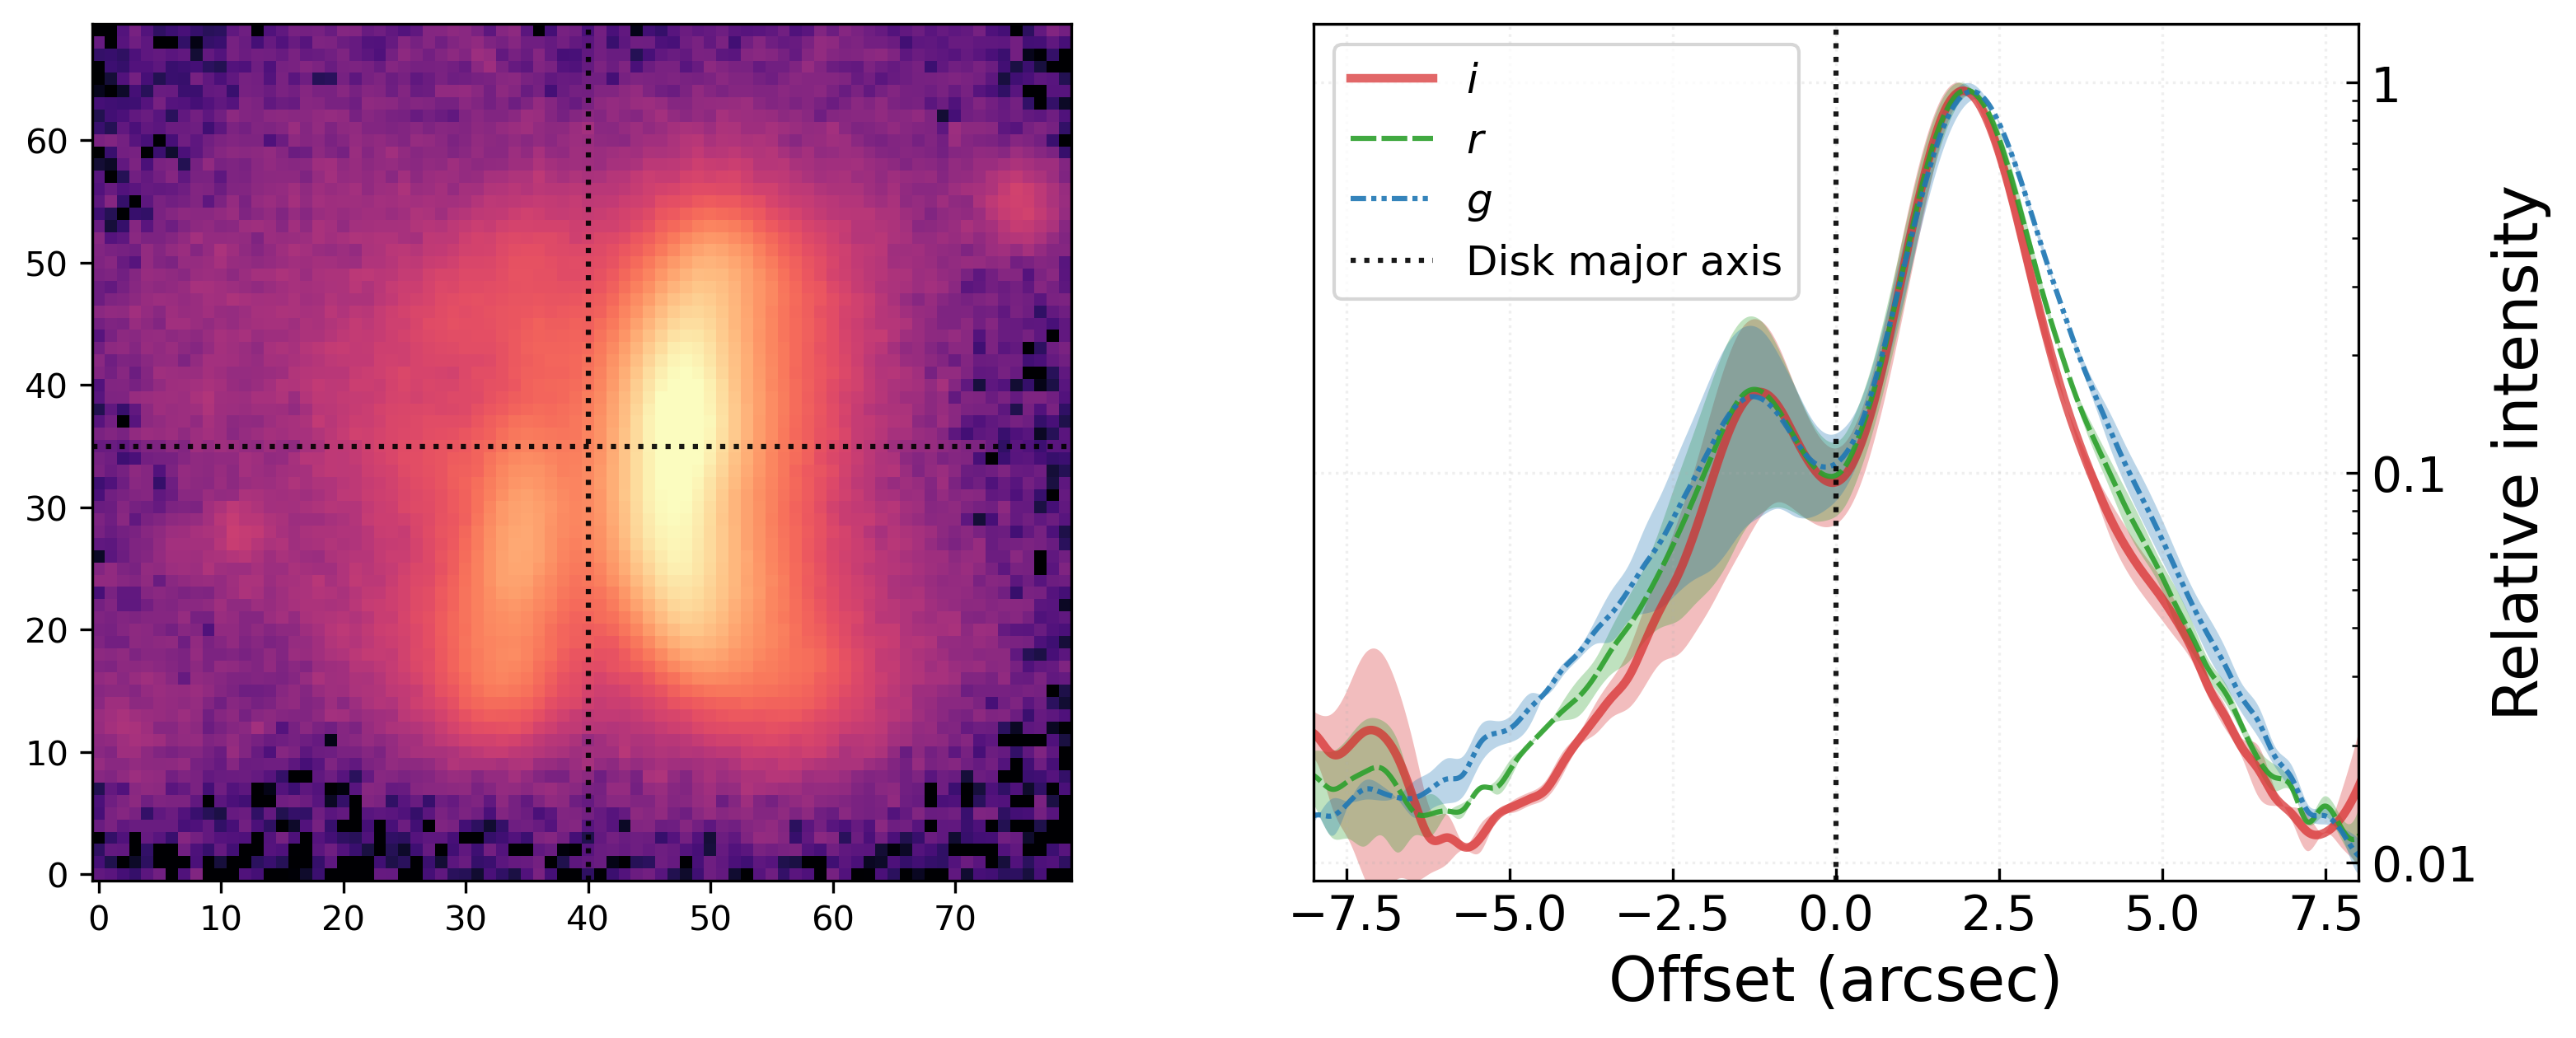

In [41]:
fig = plt.figure(dpi=300, figsize=(12,4.5))

ax1 = plt.subplot(1,2,1)

ax1.imshow(cutout_gband.data, origin='lower', cmap='magma', interpolation='nearest', norm=colors.SymLogNorm(linthresh=1e1, linscale=0.03,
                                              vmin=0, vmax=5e4), zorder=0)  

ax1.axhline(size[0]/2, c='black', ls=':', lw=1.5, alpha=0.9, zorder=1)
ax1.axvline(size[1]/2, c='black', ls=':', lw=1.5, alpha=0.9, zorder=1)


ax2 = plt.subplot(1,2,2)

ax2.plot(new_grid_centered_iband, mean_list_centered_iband/np.nanmax(maxima_iband), label='$i$', c=cmap[3], lw=2.5, alpha=0.7)
ax2.fill_between(new_grid_centered_iband, rolling_mean_iband[0]/np.nanmax(maxima_iband), rolling_mean_iband[1]/np.nanmax(maxima_iband), alpha=0.3, color=cmap[3], lw=0)

ax2.plot(new_grid_centered_rband, mean_list_centered_rband/np.nanmax(maxima_rband), label='$r$', c=cmap[2], lw=1.5, alpha=0.9, ls=(0, (5, 1)))
ax2.fill_between(new_grid_centered_rband, rolling_mean_rband[0]/np.nanmax(maxima_rband), rolling_mean_rband[1]/np.nanmax(maxima_rband), alpha=0.3, color=cmap[2], lw=0)

ax2.plot(new_grid_centered_gband, mean_list_centered_gband/np.nanmax(maxima_gband), label='$g$', c=cmap[0], lw=1.5, alpha=0.9, ls=(0, (3, 1, 1, 1, 1, 1)))
ax2.fill_between(new_grid_centered_gband, rolling_mean_gband[0]/np.nanmax(maxima_gband), rolling_mean_gband[1]/np.nanmax(maxima_gband), alpha=0.3, color=cmap[0], lw=0)

ax2.axvline(0, ls=':', lw=1.5, c='black', alpha=0.9, label='Disk major axis')


#ax2.plot(new_grid_centered_cont, mean_list_centered_cont/np.max(mean_list_centered_cont), label='SMA cont.', c='black')

ax2.grid(alpha=0.2, ls=':')
ax2.tick_params(axis="x",which='both', direction="in")

import matplotlib.ticker as ticker

ax2.set_yscale('log')
ax2.set_ylim(9e-3)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y,pos: ('{{:.{:1d}f}}'.format(int(np.maximum(-np.log10(y),0)))).format(y)))
ax2.tick_params(axis="y", which='both', direction="in")

ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

ax2.set_xlabel('Offset (arcsec)', fontsize=18)
ax2.set_ylabel('Relative intensity', fontsize=18)
ax2.set_xlim(-8.,8.)
ax2.tick_params(axis='both', which='major', labelsize=14)
#ax2.set_yticks(fontsize=12)
ax2.legend(fontsize=12)

#fig.savefig('/Users/kristina/Hamburgers/Draculas_Chivito/plots/paper_plots/PS1_radial_brightness_log_2.pdf', bbox_inches='tight')


### Print the values for brightness asymmetries: Left-ride

In [35]:
left = np.max(mean_list_centered_gband[(new_grid_centered_gband< 0.)])
right = np.max(mean_list_centered_gband[(new_grid_centered_gband> 0.)])

print(left, right, right/left)

3182.216036728899 19287.232062112213 6.060943644146226


In [36]:
left = np.max(mean_list_centered_rband[(new_grid_centered_rband< 0.)])
right = np.max(mean_list_centered_rband[(new_grid_centered_rband> 0.)])

print(left, right, right/left)

4358.663692147851 25501.346035357776 5.850725781229358


In [37]:
left = np.max(mean_list_centered_iband[(new_grid_centered_iband< 0.)])
right = np.max(mean_list_centered_iband[(new_grid_centered_iband> 0.)])

print(left, right, right/left)

6208.1420712633735 36745.88834808291 5.9189831557132875


### Print the values for brightness asymmetries: Left disk, north-south

In [38]:
bottom_left = np.max(rolling_mean_gband[0][(new_grid_centered_gband< 0.)])
top_left = np.max(rolling_mean_gband[1][(new_grid_centered_gband< 0.)])

print(bottom_left, top_left, bottom_left/top_left)

4844.79654195588 1718.1087898193903 2.819842707669967


In [39]:
bottom_left = np.max(rolling_mean_rband[0][(new_grid_centered_rband< 0.)])
top_left = np.max(rolling_mean_rband[1][(new_grid_centered_rband< 0.)])

print(bottom_left, top_left, bottom_left/top_left)

6707.039688534345 2171.6926533322576 3.0883926775932244


In [40]:
bottom_left = np.max(rolling_mean_iband[0][(new_grid_centered_iband< 0.)])
top_left = np.max(rolling_mean_iband[1][(new_grid_centered_iband< 0.)])

print(bottom_left, top_left, bottom_left/top_left)

9539.40631062132 3236.6826712192005 2.9472788282417555
